

> Import Libraries




In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

Import Data and Shuffle

In [166]:
data_set_merge=pd.read_csv("dataset-02-clean.csv")
ds =data_set_merge.sample(frac=1)
ds.head()

,unique_ids,ids,category_names,family_names,type_names,host_ids,BB_X_dims,BB_Y_dims,BB_Z_dims,BB_volumes,BB_centers,BB_plane_Zs,solid_volumes,room_names
15769,3de97adc-8480-40d2-a1b6-967092b9f58b-0017661b,1533467,Windows,BO-Klil Sliding-2 Panels 9400,BO-Klil Sliding-2 Panels 160/250 9400,bdfd839e-fa74-47ef-9124-70299d21d535-000d5057,170.00000,251.979436,22.098073,9.466042e+05,"{372.246589, 2244.30126, 2734.130282}","{-1,0,0}",104718.66150,-
6778,dedb24b2-0366-4fca-8238-2a3f87ae044e-006ca182,7119234,Doors,Access_Panel_Door_13616,"דלתות שרות פח 100 ס""מ",dedb24b2-0366-4fca-8238-2a3f87ae044e-006ca043,99.00000,204.000000,2.635000,5.321646e+04,"{-2623.655756, -292.515918, 272.0}","{-1,0,0}",40006.40594,-
18397,0f9a5625-a9c2-4a9b-b2d1-c98c30be63a8-000e72df,946911,Furniture,HermanMiller_Collection_TavoloXZ3TableRound,Round,-,70.23988,119.992676,119.992676,1.010000e+06,"{3625.159889, -986.745872, 335.049992}","{0,1,0}",33102.40075,-
9996,0b28e87c-07bb-4690-a84e-2d03ac665ce6-00f759fb,16210427,Windows,קיפ ציר תחתון,75/105 4,0b28e87c-07bb-4690-a84e-2d03ac665ce6-00f759e3,83.00000,133.000000,29.843215,3.294392e+05,"{1886.611515, 525.180582, 1512.5}","{1,0,0}",36189.70900,-
880,6a92f13b-e972-4a49-ac87-2891c797679c-005bddff,6020607,Doors,דלת הזזה דו כנפית+סף,250/230,6a92f13b-e972-4a49-ac87-2891c797679c-005bddb2,250.00000,232.000000,10.000000,5.800000e+05,"{7543.868821, 5333.176291, 2146.9}","{1,0,0}",86040.00000,-


Organize Dataset by Name


In [185]:
dataset = ds[["category_names", "BB_X_dims", "BB_Y_dims",
              "BB_Z_dims", "BB_volumes", "solid_volumes", "host_ids"
              ]]


X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values
print(X)
### replace plumbing fixtures with furniture if neccessary
Y = [item if item != 'Plumbing Fixtures' else "Furniture" for item in Y]
num_of_categories = len(set(Y))
print("amount of categries ", num_of_categories)


[[170.0 251.979436 22.098073 946604.2154 104718.6615
  'bdfd839e-fa74-47ef-9124-70299d21d535-000d5057']
 [99.0 204.0 2.635 53216.46 40006.40594
  'dedb24b2-0366-4fca-8238-2a3f87ae044e-006ca043']
 [70.23988 119.992676 119.992676 1010000.0 33102.40075 '-']
 ...
 [189.5 134.016509 25.0 634903.2128 634903.2128 '-']
 [290.0 245.015878 10.0 710546.0476 710546.0476 '-']
 [75.172378 310.0 35.0 815620.2987 775667.4633 '-']]
amount of categries  5


Encoing the Independent Var

In [168]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

Encoding Dependent Var


In [169]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

Splitting Dataset into training set and test set


In [170]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [171]:
print(x_train[0])

[65.0 220.0 7.05 100815.0 3189.584592
 '668d7962-cfa1-4235-858f-19c94db6be83-001b4bcd']


In [172]:
print(x_test[0])

[80.419363 289.5 10.0 232814.055 232814.055 '-']


In [173]:
print(y_train)

[0 3 0 ... 3 0 1]


In [174]:
print(y_test)


[3 3 0 ... 0 3 2]


Feature Scalling


In [175]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

ValueError: could not convert string to float: '668d7962-cfa1-4235-858f-19c94db6be83-001b4bcd'

Trainig the SVM Model on the training set


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


Confusion Matrix


accuracy is: 0.7319148936170212


[Text(0, 0.5, 'Doors'),
 Text(0, 1.5, 'Floors'),
 Text(0, 2.5, 'Furniture'),
 Text(0, 3.5, 'Walls'),
 Text(0, 4.5, 'Windows')]

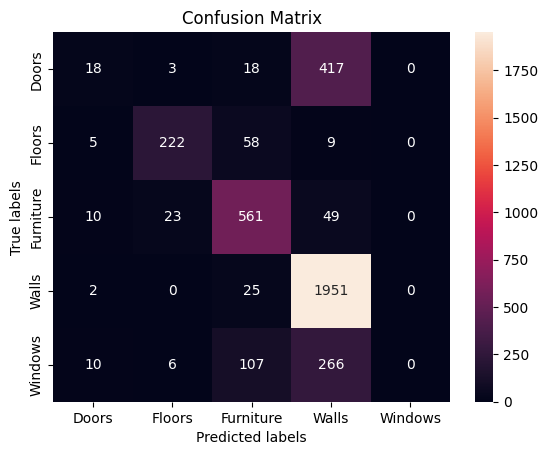

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


print('accuracy is:', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
# annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
text_labels = le.inverse_transform([i for i in range(num_of_categories)])
ax.xaxis.set_ticklabels(text_labels)
ax.yaxis.set_ticklabels(text_labels)
